# **CASO DE APLICACIÓN DE AGRUPAMIENTO: AEROLÍNEA (MERCADEO)**
Una aerolinea tiene la necesidad de identificar la estrategia de atención de sus clientes, identificando la posiblidad de generar esquemas diferenciados de acción dependiendo de las determinaciones y capacidades de los clientes. Es por esto que el equipo de mercadeo decidió realizar una encuesta tratando de levantar de manera demográfica el comportamiento de los clientes.

# Metodología ASUM - DM

1. Entedimiento del negocio: es una aerolínea que busca entender a sus clientes en particular, el objetvio de negocio es entender las diferencias o particularidades entre clientes para ofrecer modelos diferenciados de actuación.
   
2. Enfoque analítico: Diseñar un experimento que permita agrupar en una cantidad específica de grupos a los clientes de la aerolínea para definir la cantidad de acciones diferenciadas posibles.

3. Requerimiento de datos: se requieren datos demográficos, datos del servicio prestado al usuario, datos propios del negocio.

4. Recolección de los datos:
 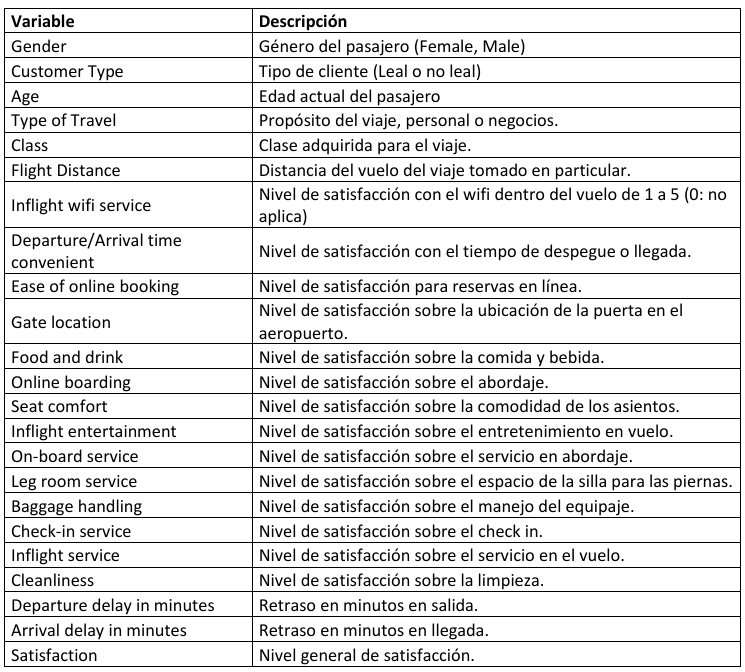

5. Entendimiento de los datos:- Identificar la existencia de datos nulos
- Exploración univariada de los datos
- Exploración multivariada de los datos
- Identifcación de correlación y multicolinealidadidad

In [2]:
# Librerías 
## Tratamiento estructurado de datos
import pandas as pd
import numpy as np

## Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

## Advertencias 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../Datasets/airline_loyalty.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

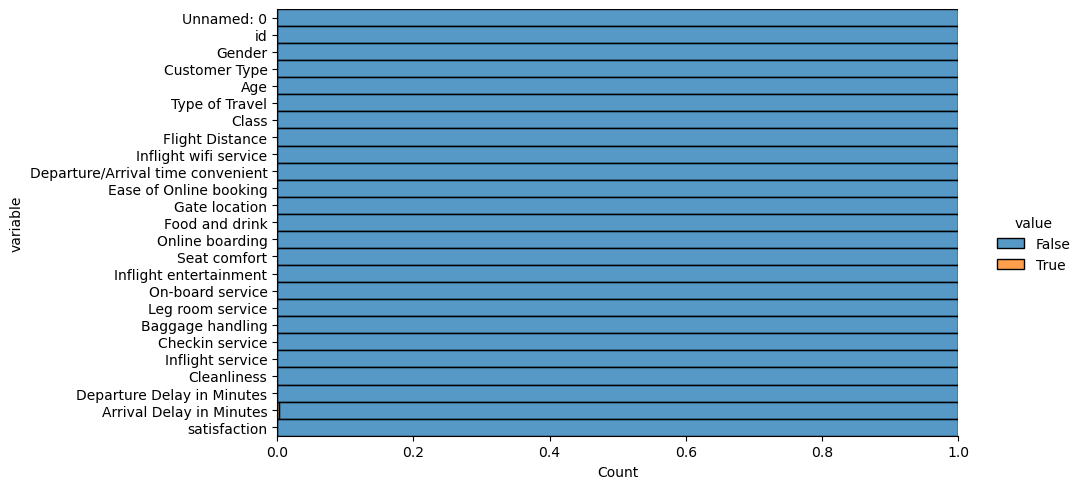

In [4]:
# Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

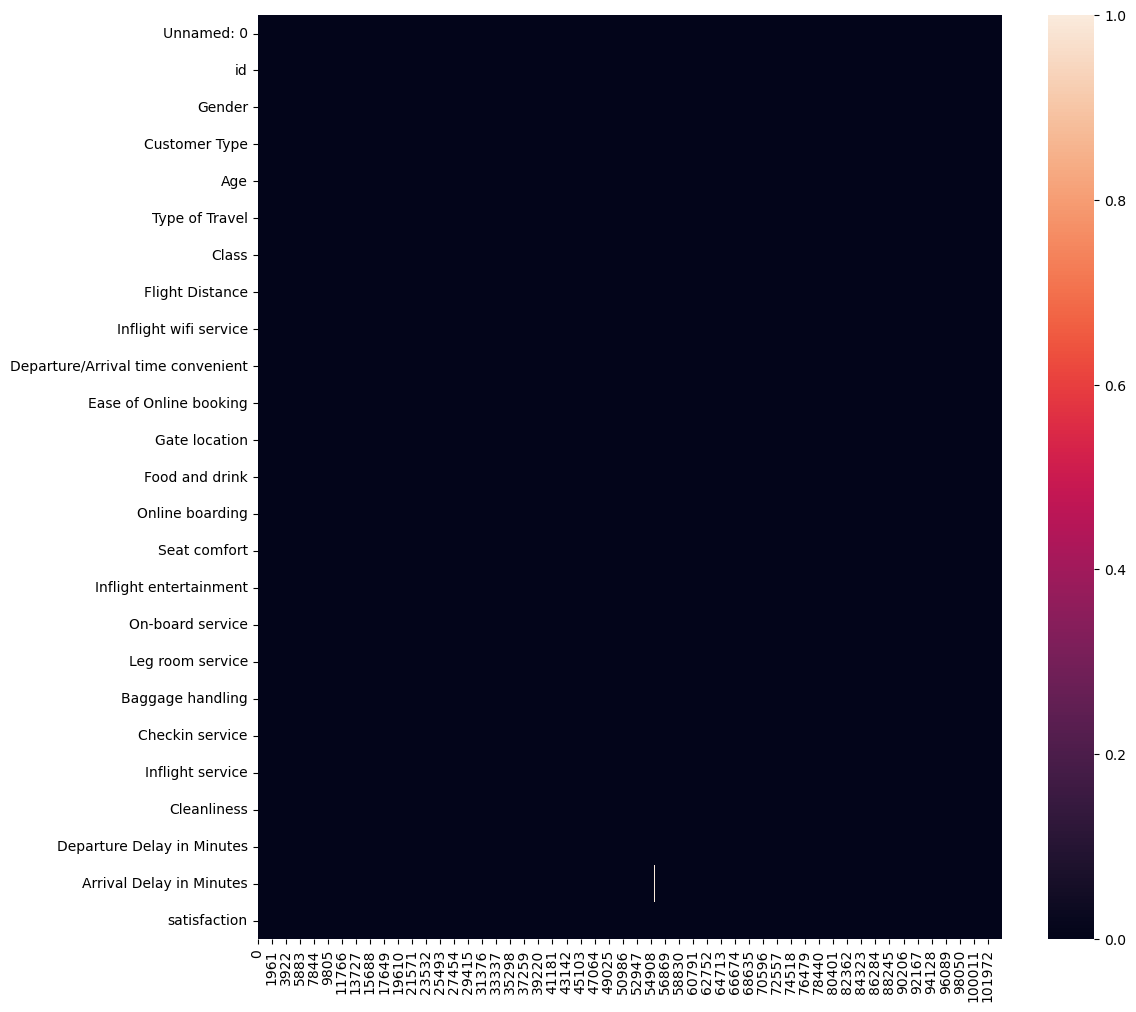

In [5]:
plt.figure(figsize = (12,12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

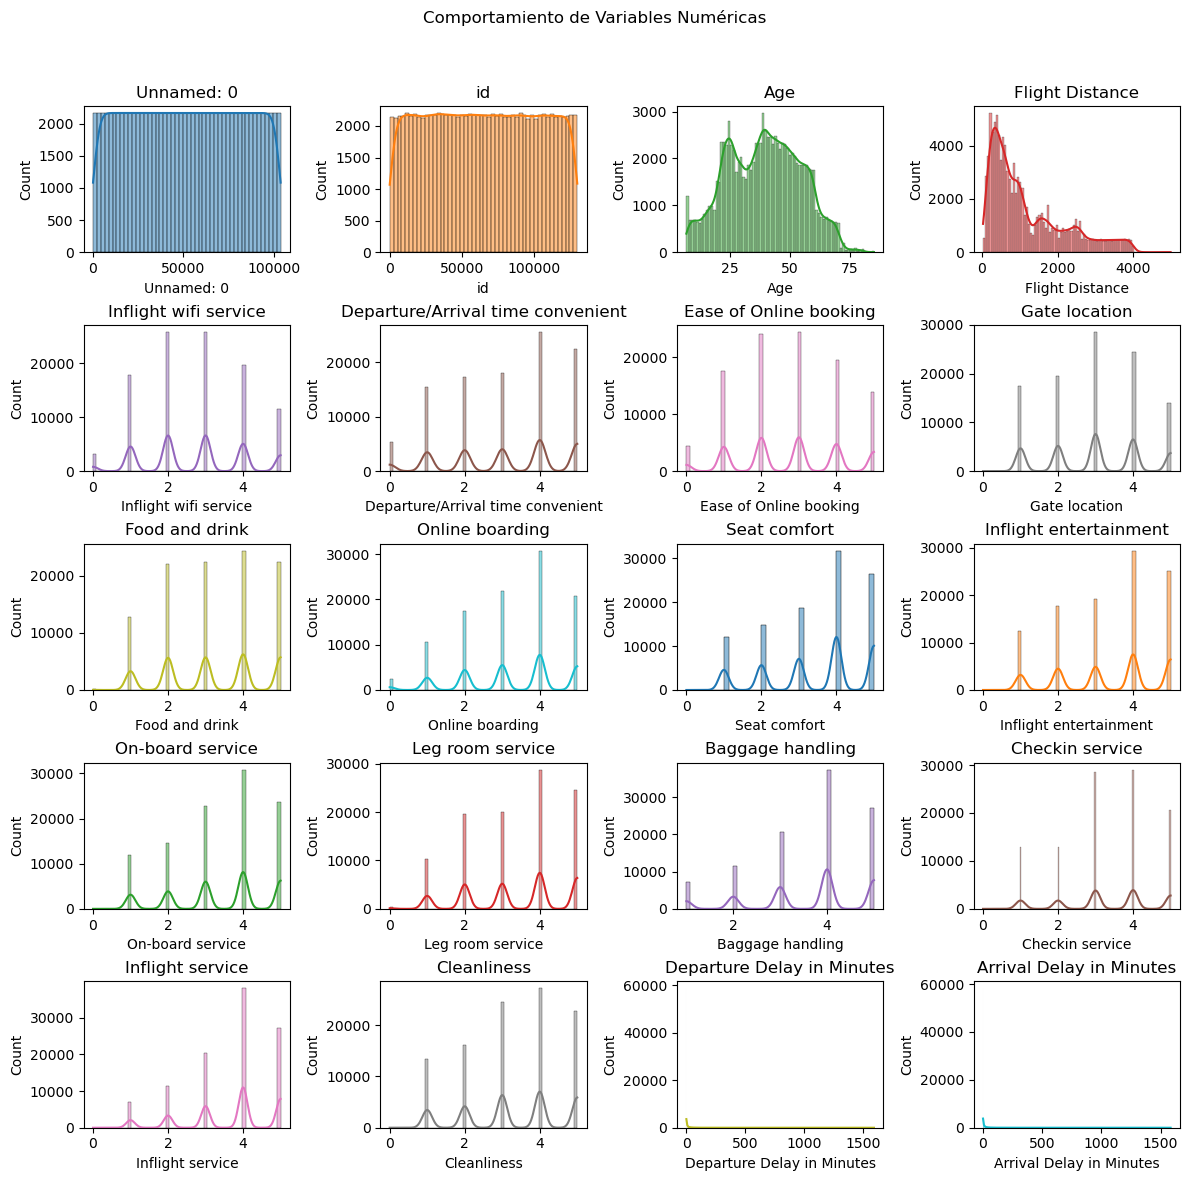

In [6]:
# Exploración univariada de los datos
## Para datos numéricos: histograma de frecuencia
## Para datos categóricos: gráficos de torta

### HISTOGRAMA DE FRECUENCIA
fig, ax = plt.subplots(5, 4, figsize = (12,12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns

for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, kde = True, 
                color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

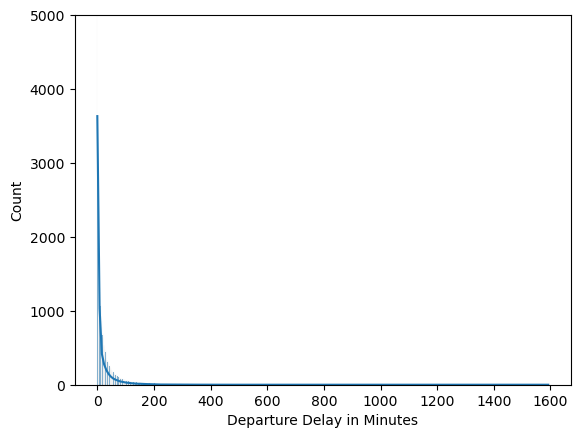

In [7]:
# Le estamos haceindo un foco a la variable, hay una mayor frecuencia de retraso en minutos mas bajos, vemos que tiene un comportamiento exponencial
# No tiene valores atipicos, es normal que haya mayor frecuencia de muchos retrasos de pocos minutos
sb.histplot(data=data, x= data['Departure Delay in Minutes'], kde =True)
plt.ylim(0,5000)
plt.show()

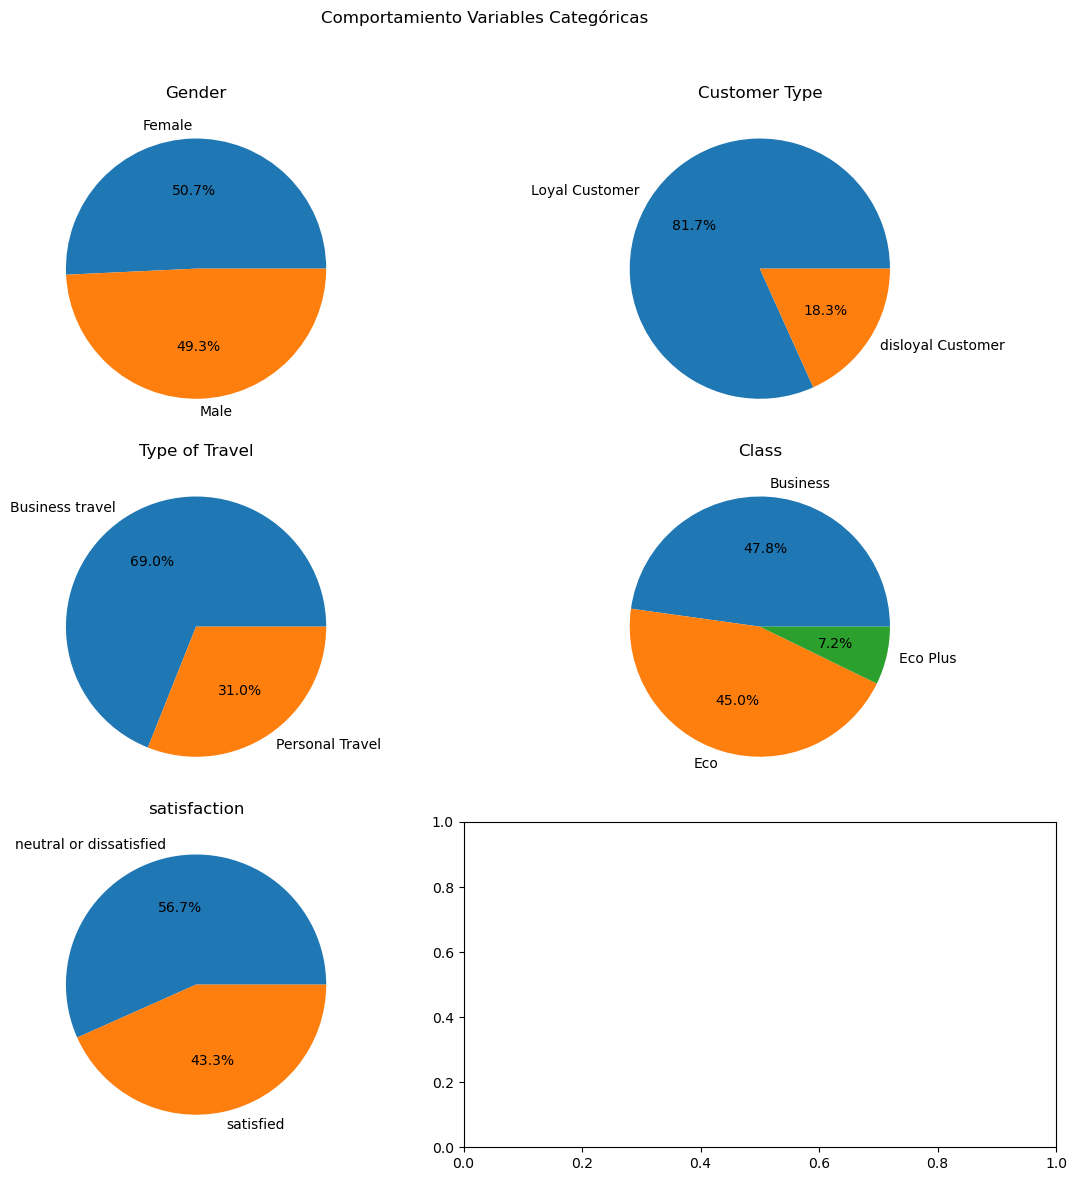

In [8]:
fig, ax = plt.subplots(3,2, figsize = (12,12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

Ignoraremos id (al ser uniforme) y Customer Type (al presentar desbalance).

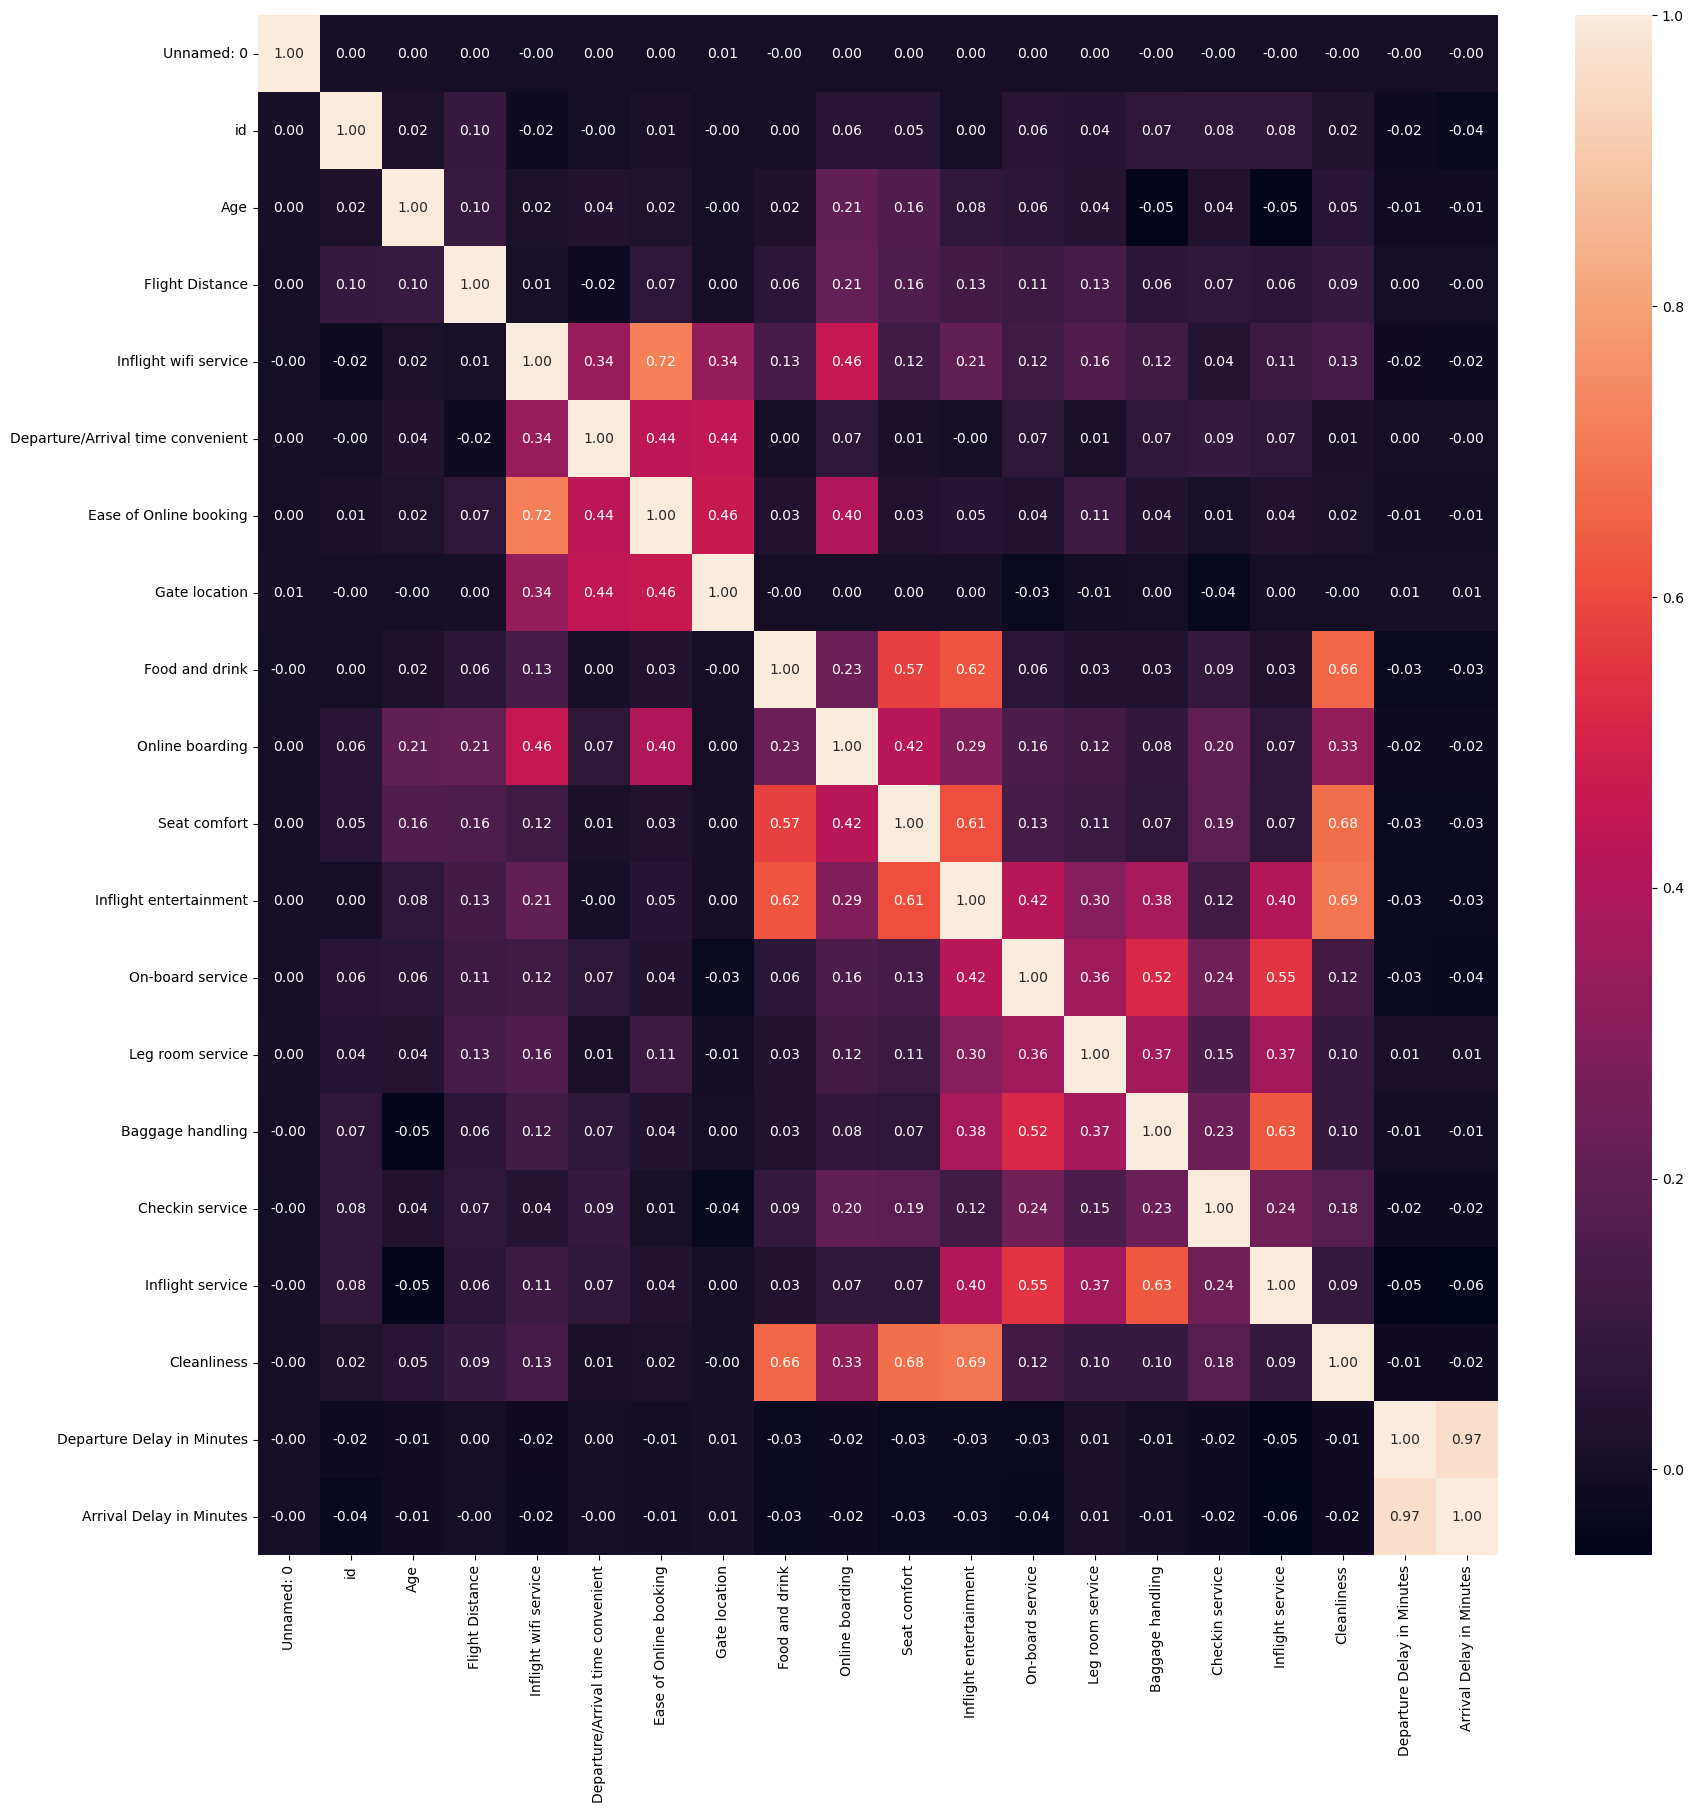

In [9]:
## GRAFICO DE CORRELACION PARA ANALISIS MULTIVARIADO

plt.figure(figsize = (20,20))
sb.heatmap(data = data.corr(numeric_only = True), annot = True, fmt = '.2f')
plt.show()

Ignoramos Arrival Delay in Minutes

6. Preparación de los Datos
- Activar las decisiones de ignorar variables
- Transformación de variables para que sean "entendibles"

In [5]:
data_mod = data.drop(['Unnamed: 0', 'id', 'Customer Type', 'Arrival Delay in Minutes'], axis = 1)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Age                                103904 non-null  int64 
 2   Type of Travel                     103904 non-null  object
 3   Class                              103904 non-null  object
 4   Flight Distance                    103904 non-null  int64 
 5   Inflight wifi service              103904 non-null  int64 
 6   Departure/Arrival time convenient  103904 non-null  int64 
 7   Ease of Online booking             103904 non-null  int64 
 8   Gate location                      103904 non-null  int64 
 9   Food and drink                     103904 non-null  int64 
 10  Online boarding                    103904 non-null  int64 
 11  Seat comfort                       103904 non-null  

In [6]:
# Transformación de variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Identificar las columnas según su tipo
num_col = data_mod.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = data_mod.select_dtypes(include = ['object']).columns.to_list()

# Definir el tipo de transformación por tipo de dato
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])

# Diseño del transformador de columnas
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_col),
                                                 ('cat', cat_transformer, cat_col)],
                                                 remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness',
                                  'Departure Delay in Minutes']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Type of Travel', 'Class',
                                  'satisfaction'])])

In [7]:
data_pre = preprocessor.fit_transform(data_mod)
data_pre

array([[0.07692308, 0.08663166, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       [0.23076923, 0.04119548, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.24358974, 0.2243538 , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29487179, 0.39660743, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.19230769, 0.19567851, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.25641026, 0.34168013, 0.2       , ..., 0.        , 1.        ,
        0.        ]])

In [8]:
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, cod_cat])
data_pro = pd.DataFrame(data_pre, columns = labels)
data_pro.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.015704,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.000628,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.006910,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


7. Construcción del modelo

Modelo por partición - Agrupamiento K-means

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

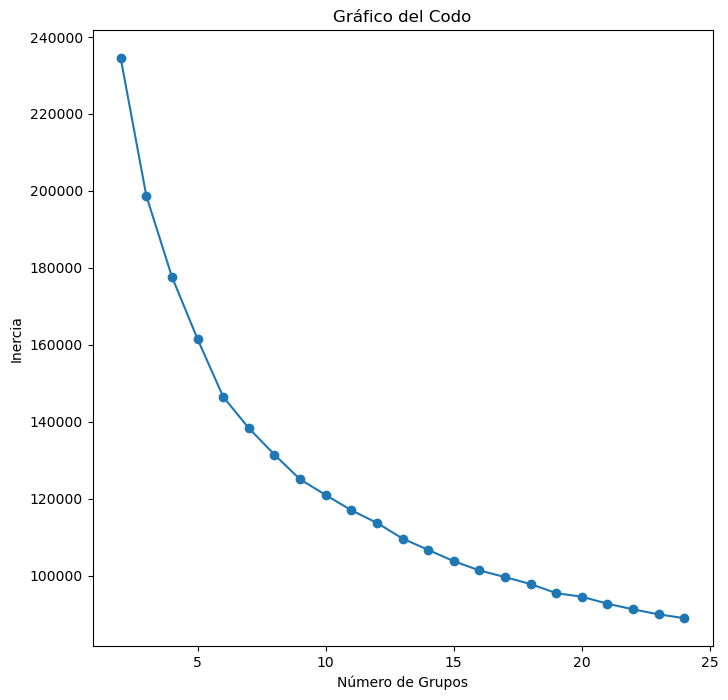

In [18]:
# Buscar el valor del k
range_k = range(2, 25)
inertia = []

for n_clusters in range_k:
    kmeans_model = KMeans(n_clusters = n_clusters,
                          n_init = 20, # Semilla
                          random_state = 123) # Replicabilidad
    kmeans_model.fit(data_pro)
    inertia.append(kmeans_model.inertia_)

plt.figure(figsize = (8,8))
plt.plot(range_k, inertia, marker = 'o')
plt.title('Gráfico del Codo')
plt.xlabel('Número de Grupos')
plt.ylabel('Inercia')
plt.show()

Vemos que la inercia entre los números de grupos comienza a ser pequeña a partir de 6 grupos y es más o menos la misma hasta 10

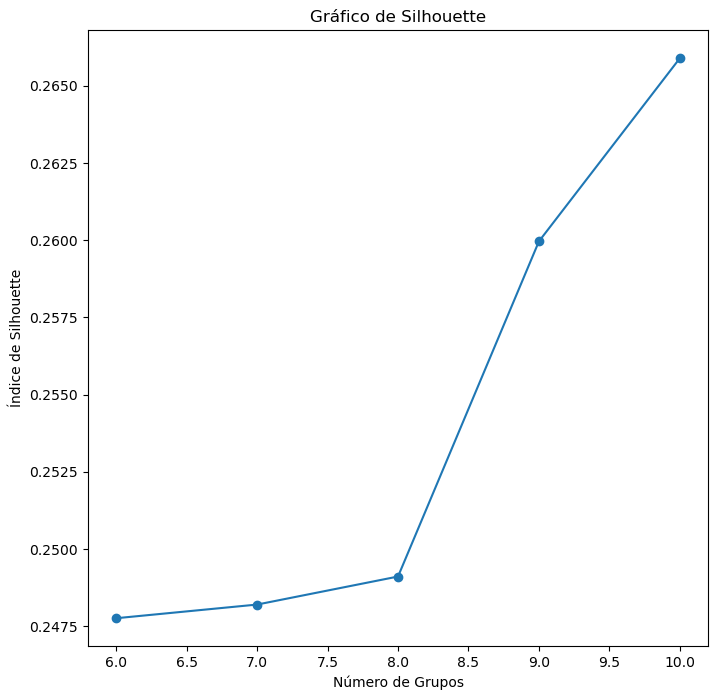

In [19]:
# Búsqueda fina de k
range_k = range(6,11)
sil_score = []

for n_clusters in range_k:
    kmeans_model = KMeans(n_clusters = n_clusters,
                          n_init = 20, random_state = 123)
    kmeans_model.fit(data_pro)
    cluster_label = kmeans_model.fit_predict(data_pro)
    sil_avg = silhouette_score(data_pro, cluster_label)
    sil_score.append(sil_avg)

plt.figure(figsize = (8,8))
plt.plot(range_k, sil_score, marker = 'o')
plt.title('Gráfico de Silhouette')
plt.xlabel('Número de Grupos')
plt.ylabel('Índice de Silhouette')
plt.show()

In [31]:
kmeans_model_final = KMeans(n_clusters = 10, n_init = 20, random_state = 123)
kmeans_model_final.fit(data_pro)

KMeans(n_clusters=10, n_init=20, random_state=123)

Modelo jerárquico - Agrupamiento aglomerativo

In [32]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [29]:
#Función para dibujar el dendrograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
 
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
 
    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [18]:
np.random.seed(25)
data_pro_sample = data_pro.sample(3000)

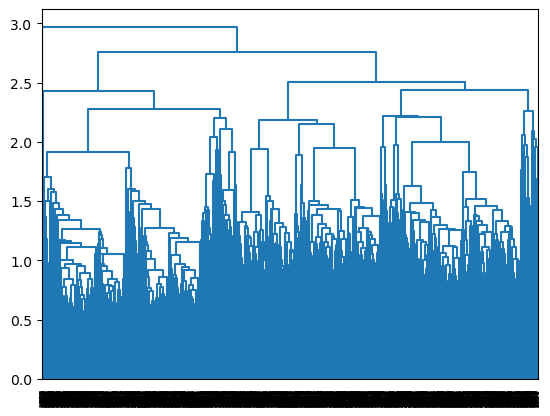

In [34]:
# Promedio
h_clust_mean = AgglomerativeClustering(metric = 'euclidean', linkage = 'average', distance_threshold = 0, n_clusters = None)
h_clust_mean.fit(X = data_pro_sample)
dibujarDendrograma(h_clust_mean, color_threshold = 0)

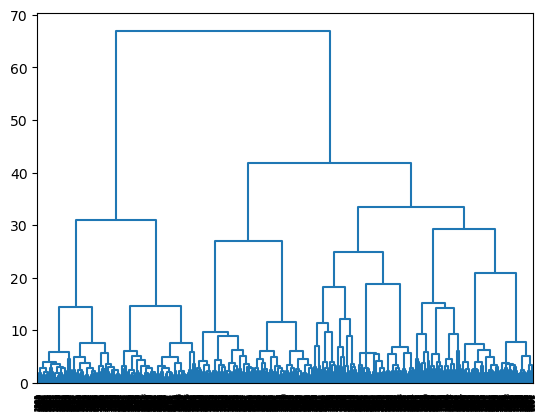

In [31]:
# Varianza 
h_clust_ward = AgglomerativeClustering(metric = 'euclidean', linkage = 'ward', distance_threshold = 0, n_clusters = None)
h_clust_ward.fit(X = data_pro_sample)
dibujarDendrograma(h_clust_ward, color_threshold = 0)

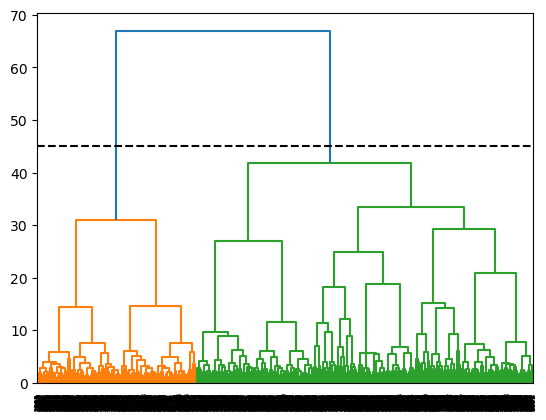

In [39]:
dendrogram_prun = 45 # A ojo
dibujarDendrograma(h_clust_ward, color_threshold = dendrogram_prun)
plt.axhline(y = dendrogram_prun, c = 'black', linestyle = '--' )
plt.show()

In [33]:
h_clust_final = AgglomerativeClustering(metric = 'euclidean', linkage = 'ward', n_clusters = 2)
h_clust_final.fit(data_pro_sample)

AgglomerativeClustering()

Modelo por densidad - Agrupamiento DBScan

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

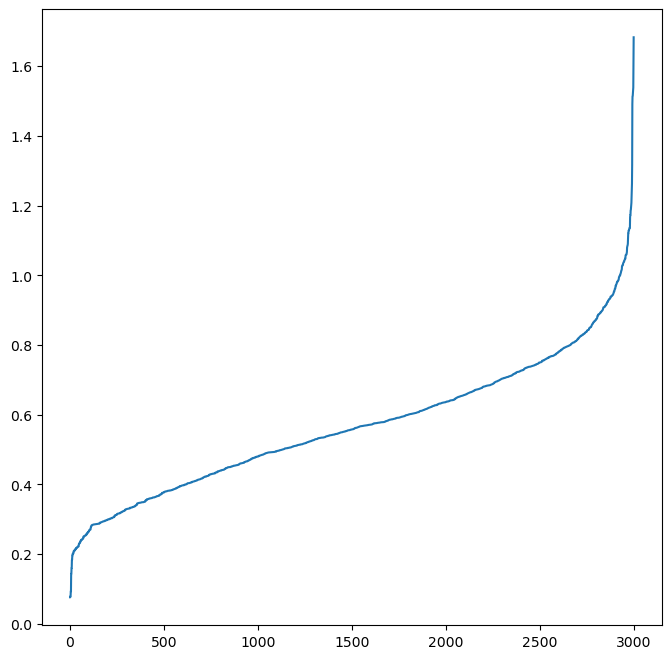

In [19]:
# Mínimo necesito 3 vecinos 
neighbors = NearestNeighbors(n_neighbors = 3)
neighbors_fit = neighbors.fit(data_pro_sample)
distance, index = neighbors_fit.kneighbors(data_pro_sample)
distance = np.sort(distance, axis = 0)
distance = distance[:,1]
plt.figure(figsize = (8,8))
plt.plot(distance)
plt.show()

In [20]:
eps_values = np.arange(1.0, 1.6, 0.1)
min_samples = np.arange(2,10)
dbscan_params = list(product(eps_values, min_samples))
sil_score = []
for p in dbscan_params:
    y_pred = DBSCAN(eps = p[0], min_samples = p[1]).fit_predict(data_pro_sample)
    sil_score.append(silhouette_score(data_pro_sample, y_pred))

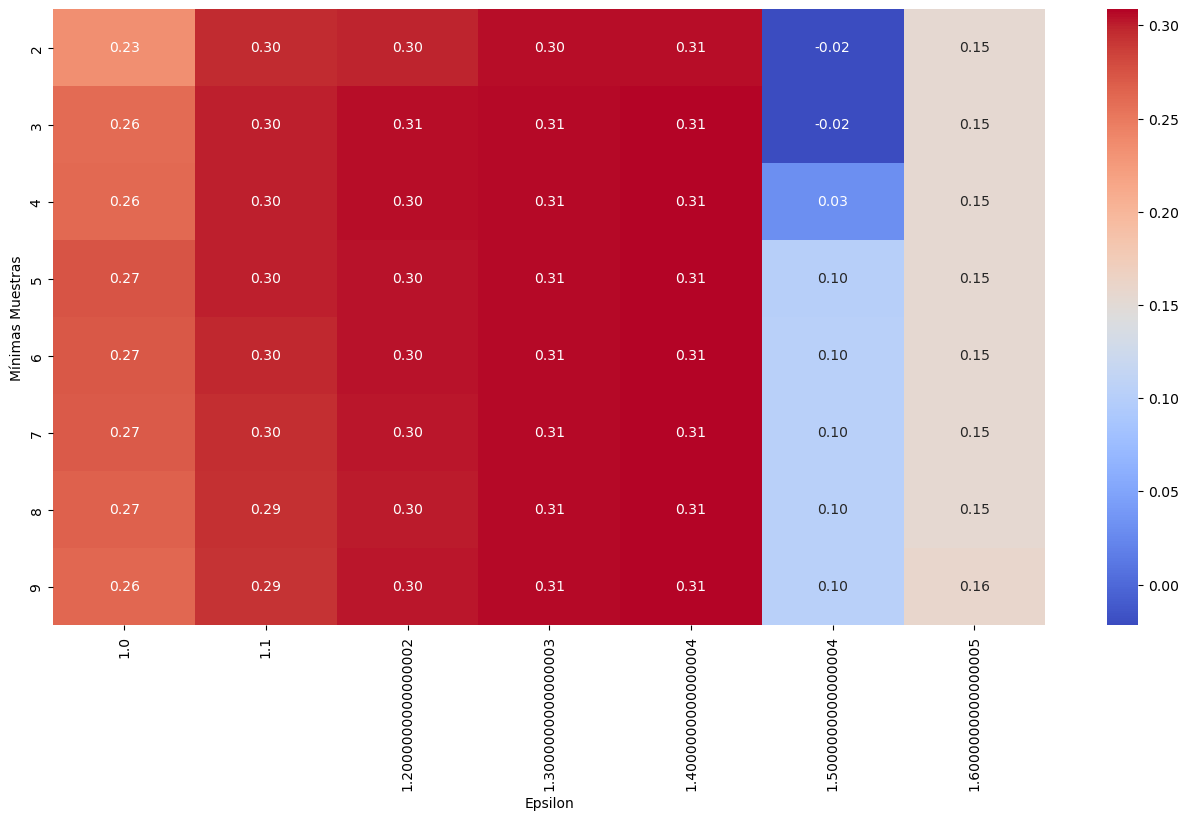

In [23]:
df_param_adj = pd.DataFrame.from_records(dbscan_params, columns = ['Epsilon','Mínimas Muestras'])
df_param_adj['Score'] = sil_score
pivot_data = pd.pivot_table(df_param_adj, values = 'Score', index = 'Mínimas Muestras', columns = 'Epsilon')
plt.figure(figsize = (16,8))
sb.heatmap(pivot_data, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

Disminuimos la complejidad computacional escogiendo el epsilon mejor posible así como la menor cantidad de mínimas muestras.

In [24]:
dbscan_final = DBSCAN(eps = 1.3, min_samples = 3)
dbscan_final.fit(data_pro_sample)

DBSCAN(eps=1.3, min_samples=3)

Modelo por densidad - Agrupamiento Gaussian Mixture Models (GMM)

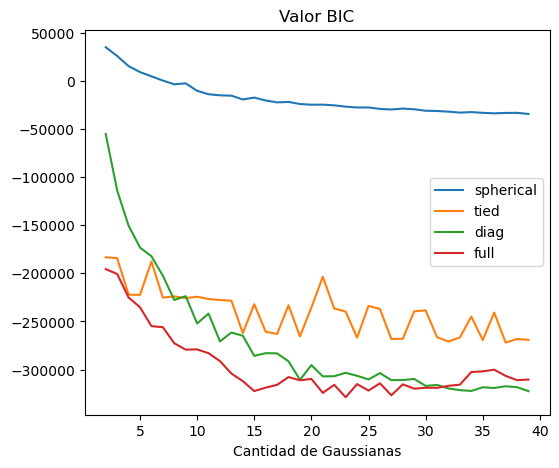

In [27]:
from sklearn.mixture import GaussianMixture
fig, ax = plt.subplots(figsize = (6,5))
n_gauss = range(2,40)
var_types = ['spherical', 'tied', 'diag', 'full']
for covariance_type in var_types:
    valor_bic = []
    for i in n_gauss:
        modelo = GaussianMixture(n_components = i, covariance_type = covariance_type)
        modelo = modelo.fit(data_pro_sample)
        valor_bic.append(modelo.bic(data_pro_sample))

    ax.plot(n_gauss, valor_bic, label = covariance_type)
ax.set_title('Valor BIC')
ax.set_xlabel('Cantidad de Gaussianas')
ax.legend()
plt.show()

El menor valor se para el tipo de varianza full y 23 gaussianas.
Usaremos 15 por efectos de la clase.

In [37]:
gmm_final = GaussianMixture(n_components = 15, covariance_type = 'full')
gmm_final.fit(data_pro_sample)

GaussianMixture(n_components=15)

8. Evaluación del Modelo

In [38]:
labels_kmeans = kmeans_model_final.predict(data_pro_sample)
labels_h_clust = h_clust_final.fit_predict(data_pro_sample)
labels_dbscan = dbscan_final.fit_predict(data_pro_sample)
labels_gmm = gmm_final.predict(data_pro_sample)

In [42]:
sil_kmeans = silhouette_score(data_pro_sample, labels_kmeans)
sil_h_clust = silhouette_score(data_pro_sample, labels_h_clust)
sil_dbscan = silhouette_score(data_pro_sample, labels_dbscan)
sil_gmm = silhouette_score(data_pro_sample, labels_gmm)
print(f'El índice de Silhouette para: \nKMeans = {round(sil_kmeans, 2)}\nAglomerativo = {round(sil_h_clust, 2)}\nDBScan = {round(sil_dbscan, 2)}\nGMM = {round(sil_gmm, 2)}\n')

El índice de Silhouette para: 
KMeans = 0.26
Aglomerativo = 0.25
DBScan = 0.31
GMM = 0.18



In [43]:
# Debo verificar que no tengan ruido
np.unique(labels_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22], dtype=int64)

Tengo 23 puntos y una categoría de ruido

In [44]:
data_pro_sample['DBSCAN'] = labels_dbscan
data_pro_sample

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,DBSCAN
39729,0.435897,0.208805,0.6,0.8,0.6,0.6,1.0,0.6,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
79045,0.307692,0.191640,0.4,1.0,0.4,0.8,0.8,0.4,0.8,0.8,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
49541,0.628205,0.074313,1.0,0.8,0.8,0.8,0.8,0.6,0.8,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
12516,0.346154,0.425081,0.8,0.8,1.0,0.8,0.2,0.8,0.8,0.8,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3
82204,0.551282,0.176898,1.0,0.2,0.2,0.2,0.4,0.4,0.8,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63900,0.782051,0.045638,0.0,0.8,0.0,0.6,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,18
42466,0.358974,0.223546,0.2,0.8,0.2,0.4,1.0,0.2,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
15206,0.205128,0.120557,0.8,0.8,0.8,0.6,0.4,0.8,0.4,0.4,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6
49787,0.461538,0.103393,0.8,1.0,0.8,0.6,0.6,0.6,0.8,0.6,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [45]:
data_pro_sample.DBSCAN.value_counts()

DBSCAN
 8     521
 5     504
 1     342
 0     323
 11    216
 15    198
 4     192
 3     173
 6      85
 2      83
 14     54
 13     44
 18     41
 10     39
 19     31
 7      31
 9      27
 16     25
 12     24
 21     21
-1      13
 20      6
 22      4
 17      3
Name: count, dtype: int64

Tengo 23 + 13 grupos